# Extracting Target Masks: M1 and DLPFC from IBSR Segmentation

This notebook demonstrates how to load IBSR segmentation and parcellation images, identify cortex voxels, and extract masks for the precentral gyrus (M1) and dorsolateral prefrontal cortex (DLPFC) using the atlas.


In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


## 1. Set file paths
Update these paths to point to your subject's segmentation and parcellation files.

In [2]:
subject = 'IBSR_10'
base_dir = Path('../data/subset') / subject / 'segmentation/analyze'
seg_path = base_dir / f'{subject}_seg_ana.img'
parc_path = base_dir / f'{subject}_parc_ana.img'
print('Segmentation path:', seg_path)
print('Parcellation path:', parc_path)

Segmentation path: ../data/subset/IBSR_10/segmentation/analyze/IBSR_10_seg_ana.img
Parcellation path: ../data/subset/IBSR_10/segmentation/analyze/IBSR_10_parc_ana.img


## 2. Load segmentation and parcellation images


In [3]:
seg_img = nib.load(str(seg_path))
seg_data = seg_img.get_fdata().astype(int)

parc_img = nib.load(str(parc_path))
parc_data = parc_img.get_fdata().astype(int)

print('Segmentation shape:', seg_data.shape)
    

Segmentation shape: (256, 256, 128, 1)


## 3. Identify cortex voxels in segmentation

**Note:** Replace `cortex_labels` with the correct label values for cortex in your dataset.

In [4]:
# Example: cortex_labels = [3, 42]  # Replace with actual values
cortex_labels = [3, 42]  # TODO: Update with correct labels
cortex_mask = np.isin(seg_data, cortex_labels)
print('Cortex voxels:', np.sum(cortex_mask))

Cortex voxels: 439226


## 4. Extract M1 and DLPFC masks from parcellation atlas

**Note:** Replace `M1_labels` and `DLPFC_labels` with the correct label values for your atlas.

In [5]:
# Example: M1_labels = [10, 11]; DLPFC_labels = [20, 21]  # Replace with actual values
M1_labels = [8]      # TODO: Update with correct labels
DLPFC_labels = [5]   # TODO: Update with correct labels

M1_mask = np.isin(parc_data, M1_labels)
DLPFC_mask = np.isin(parc_data, DLPFC_labels)

# Optionally restrict to cortex
M1_cortex_mask = M1_mask & cortex_mask
DLPFC_cortex_mask = DLPFC_mask & cortex_mask

print('M1 mask voxels:', np.sum(M1_cortex_mask))
print('DLPFC mask voxels:', np.sum(DLPFC_cortex_mask))

M1 mask voxels: 12589
DLPFC mask voxels: 10755


## 5. Visualize a slice


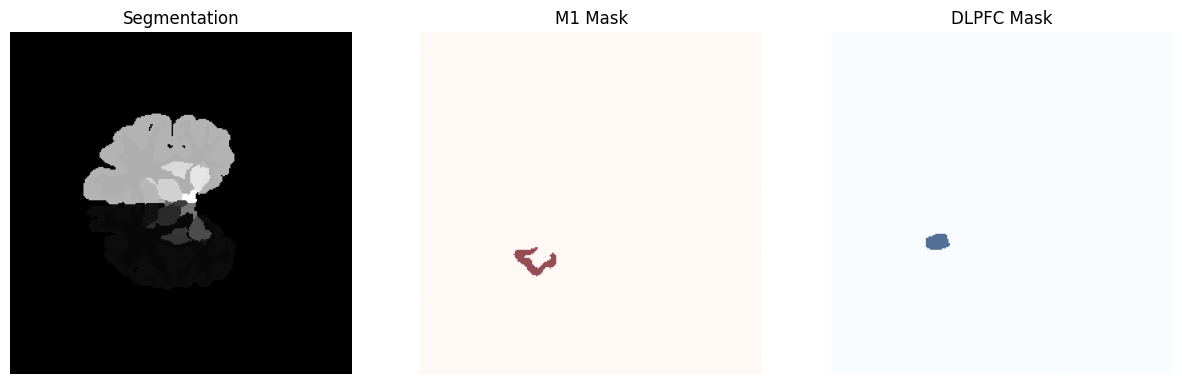

In [8]:
slice_idx = seg_data.shape[2] // 2
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(seg_data[:,:,slice_idx], cmap='gray')
plt.title('Segmentation')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(M1_cortex_mask[:,:,slice_idx], cmap='Reds', alpha=0.7)
plt.title('M1 Mask')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(DLPFC_cortex_mask[:,:,slice_idx], cmap='Blues', alpha=0.7)
plt.title('DLPFC Mask')
plt.axis('off')
plt.savefig("overlay_cortex_IBSRparc.png", dpi=300, bbox_inches="tight")

plt.show()

## 6. Save masks as NIfTI files


In [7]:
M1_img = nib.Nifti1Image(M1_cortex_mask.astype(np.uint8), seg_img.affine)
DLPFC_img = nib.Nifti1Image(DLPFC_cortex_mask.astype(np.uint8), seg_img.affine)
nib.save(M1_img, f'{subject}_M1_mask.nii.gz')
nib.save(DLPFC_img, f'{subject}_DLPFC_mask.nii.gz')
print('Masks saved!')

Masks saved!
